- HELP International is an `international humanitarian NGO` that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

- After the recent funding programmes, they have been able to raise around 10 million dollar. Now the CEO of the NGO needs to decide `how to use this money strategically and effectively`. The significant `issues` that come while making this `decision` are mostly related to `choosing the countries` that are in the `direst need of aid`. 

 

#### And this is where you come in as a data analyst. Your job is to `categorise the countries` using some `socio-economic` and `health factors` that determine the overall development of the country. Then you need to `suggest the countries` which the CEO needs to `focus` on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.


- Objectives
#### Your main task is to `cluster the countries` by the factors mentioned above and then `present your solution` and `recommendations` to the CEO using a PPT.  The following approach is suggested :

 

Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.
Outlier Analysis: You must perform the`Outlier Analysis` on the dataset. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is `find the outliers` in the dataset, and then `choose whether to keep them or remove them depending on the results you get`.
Try both `K-means and Hierarchical clustering(both single and complete linkage)` on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]
##### Analyse the clusters and `identify` the ones which are in `dire need of aid`. You can analyse the clusters by `comparing` how these three variables - `[gdpp, child_mort and income]` vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.
- Also, you need to perform `visualisations` on the `clusters` that have been formed.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. `Make sure` you create visualisations for all the three pairs. You can also choose other types of plots like boxplots, etc. 
- Both K-means and Hierarchical may give different results because of previous analysis (whether you chose to keep or remove the outliers, how many clusters you chose,  etc.) Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you report back `at least 5 countries` which are in `direst need of aid` from the analysis work that you perform.
 

Results  Expected
A well-commented Jupyter notebook containing the Clustering Models(both K-means and Hierarchical Clustering) and the final list of countries.
Present the `overall approach` of the analysis in a presentation 
`Mention` the problem statement and the analysis approach.
`Explain` the results of  Clustering Model briefly.
Include `visualisations` and `summarise` the most important results in the presentation.
Make sure that you mention the final list of countries here ( Don't just mention the cluster id or cluster name here. Mention the names of all the countries.)

In [1]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# full display of columns and rows
pd.set_option('display.max_column',None,'display.max_colwidth',1000,"display.max_rows",10000)

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

##### Reading the Dataset

In [2]:
# importing the dataset
data = pd.read_csv('Country-data.csv')
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


##### Inspect the dataframe's columns, shapes, variable types etc

In [3]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
# count column-wise null
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
# checking if there is any NULL data

data.isnull().any().any()

False

- `No` missing values, we can proceed

##### Data Preparation

In [10]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
data['exports'] = round((data['gdpp']*data.exports.values)/100,2)

data['health'] = round((data['gdpp']*data.health.values)/100,2)

data['imports'] = round((data['gdpp']*data.imports.values)/100,2)

In [12]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.30,1648.00,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.68,1458.66,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.87,10847.10,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.00,22418.20,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.39,1208.88,16000,13.800,69.1,1.92,5840


- While `understanding the data`, we get to know that `exports`, `import` and `health` columns are in `percentage`. So, we have prepared our data by `transforming` into their `actual values`

##### Data Visualization

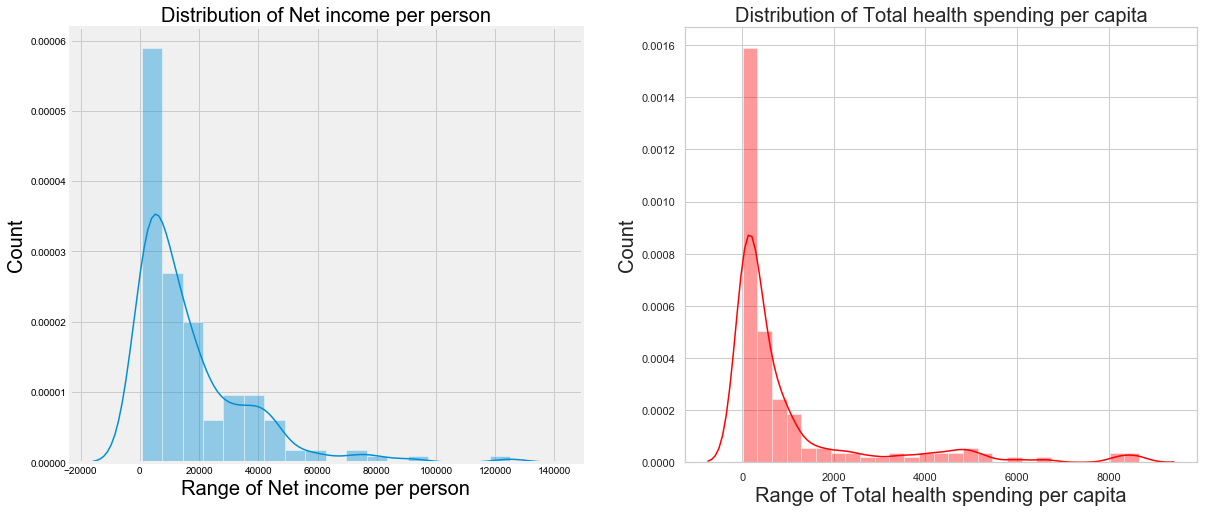

In [13]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['income'])
plt.title('Distribution of Net income per person', fontsize = 20)
plt.xlabel('Range of Net income per person',fontsize = 20)
plt.ylabel('Count',fontsize = 20)


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['health'], color = 'red')
plt.title('Distribution of Total health spending per capita', fontsize = 20)
plt.xlabel('Range of Total health spending per capita',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

- By looking at the plots,

we can `infer` one thing that There are `very few people` who earn more than `1000 US Dollars`. Most of the people have an earning of around `100-500 US Dollars`. Also, we can say that the `most of them` were in `least Income` is around `20 US Dollars`.

The total health spending per capita is `very less` due to less income but `fewer` were able to spend on their health.

From this, we can `infer` how income `correlated` with health means if `income` is `more` then they can able to `spend more` on their `health` if `less` then `unable` to spend on their `health`

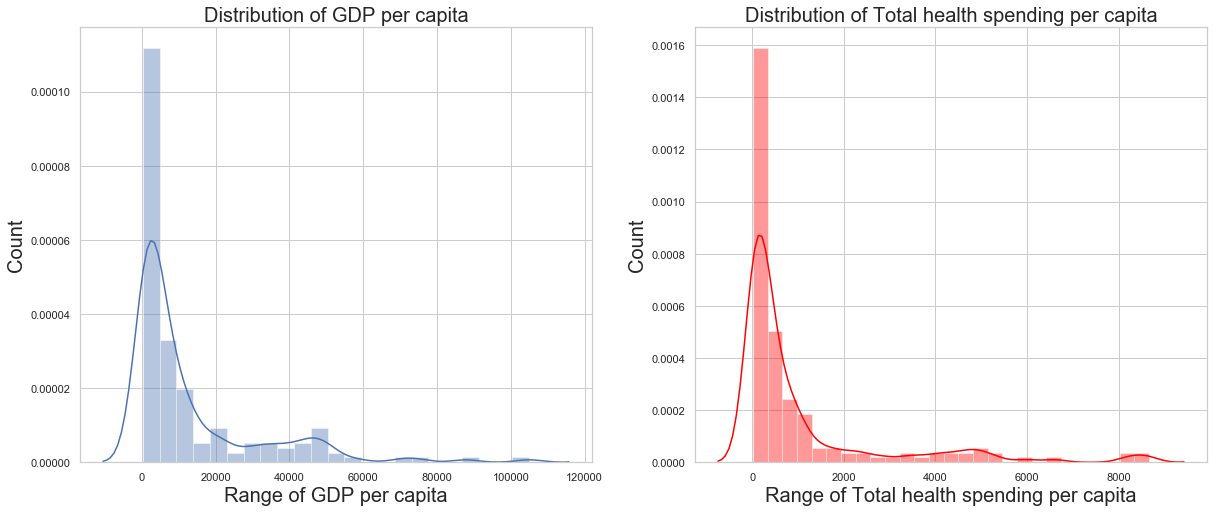

In [14]:
plt.subplot(1, 2, 1)

sns.distplot(data['gdpp'])
plt.title('Distribution of GDP per capita', fontsize = 20)
plt.xlabel('Range of GDP per capita',fontsize = 20)
plt.ylabel('Count',fontsize = 20)


plt.subplot(1, 2, 2)

sns.distplot(data['health'], color = 'red')
plt.title('Distribution of Total health spending per capita', fontsize = 20)
plt.xlabel('Range of Total health spending per capita',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

- By looking at the plots,

`More` GDP per capita lies in range `10 to 15000` and `less` lies between `18000 to 50000`

`More` Total health spending per capita lies in range `10 to 1500` and `less` lies between `1800 to 5000`

we can `infer` that if `GDP per capita` is `more` than `total health spending per capita` is also `more`. So, we can say that total health spending per capita is `dependent` on GDP per capita

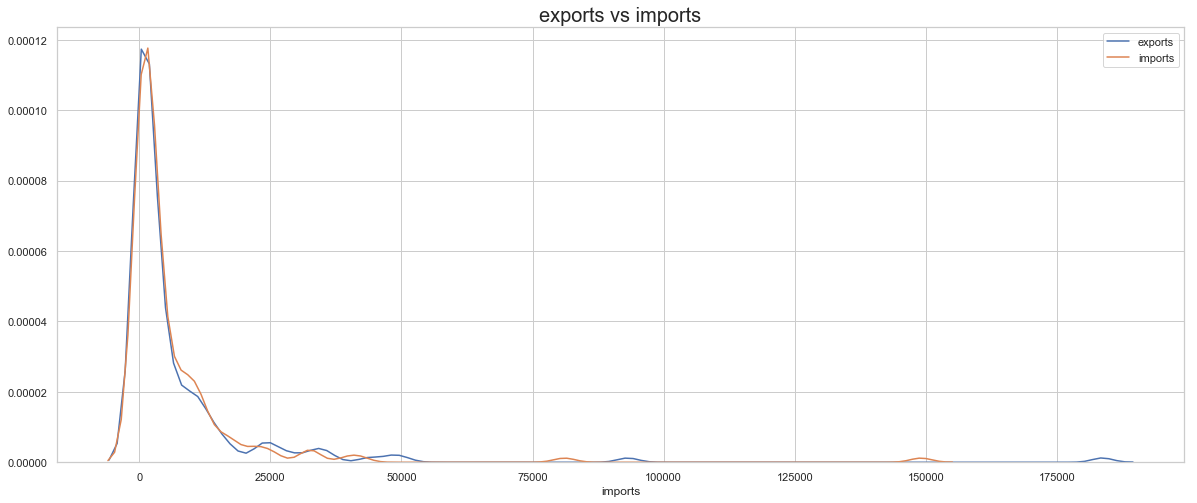

In [15]:
sns.distplot(data['exports'], hist = False, label='exports')
sns.distplot(data['imports'], hist = False, label='imports')
plt.title('exports vs imports', fontsize = 20)
plt.show()

- It clearly infers that `amount` of exports and imports were done `approximately the same`

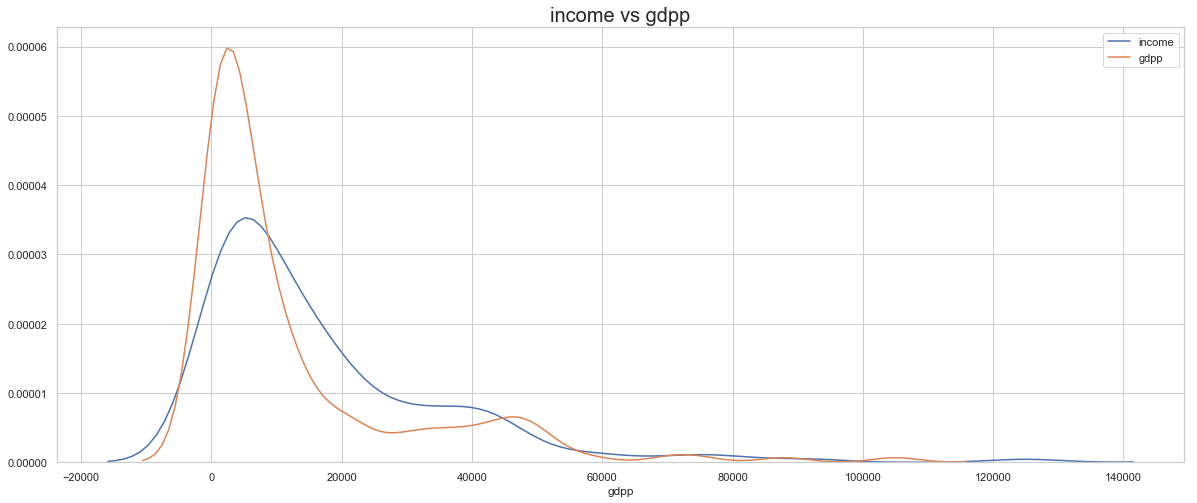

In [16]:
sns.distplot(data['income'], hist = False, label='income')
sns.distplot(data['gdpp'], hist = False, label='gdpp')
plt.title('income vs gdpp', fontsize = 20)
plt.show()

- It infers that `countries` which are `moderate earner` have `high` GDP

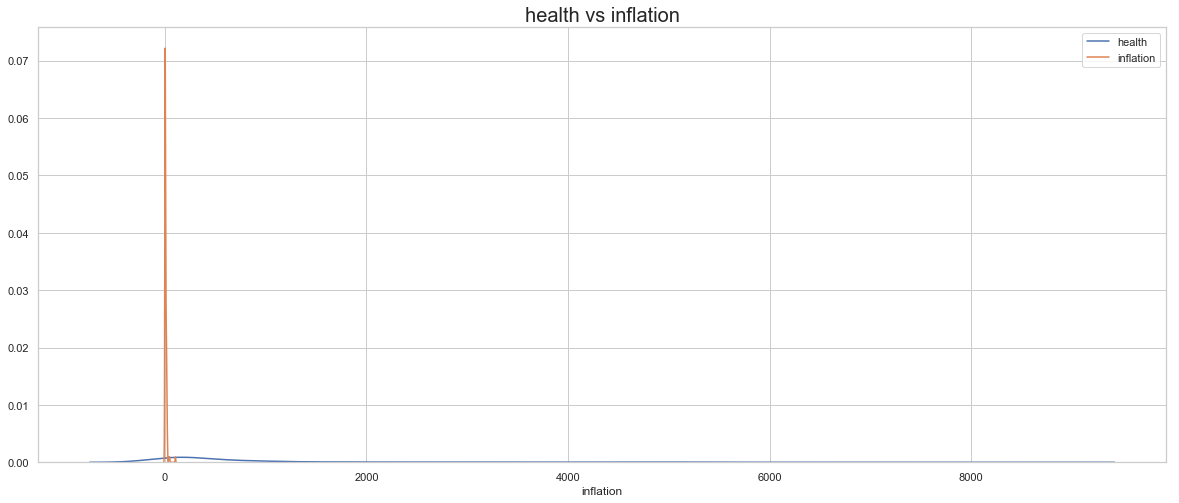

In [17]:
sns.distplot(data['health'], hist = False, label='health')
sns.distplot(data['inflation'], hist = False, label='inflation')
plt.title('health vs inflation', fontsize = 20)
plt.show()

- It infers that those `countries` which has an annual growth rate of total GDP is `more` had spent `very less` on their health

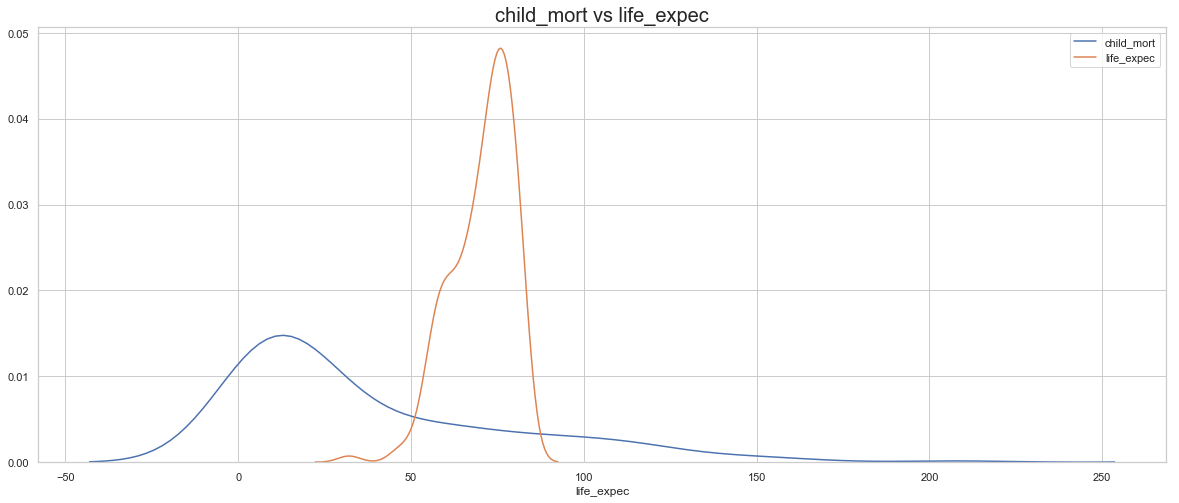

In [18]:
sns.distplot(data['child_mort'], hist = False, label='child_mort')
sns.distplot(data['life_expec'], hist = False, label='life_expec')
plt.title('child_mort vs life_expec', fontsize = 20)
plt.show()

- It `infers` that those countries which has child_mort `more` has `very less` life_expec and those countries which have child_mort less has `very very high` life_expec

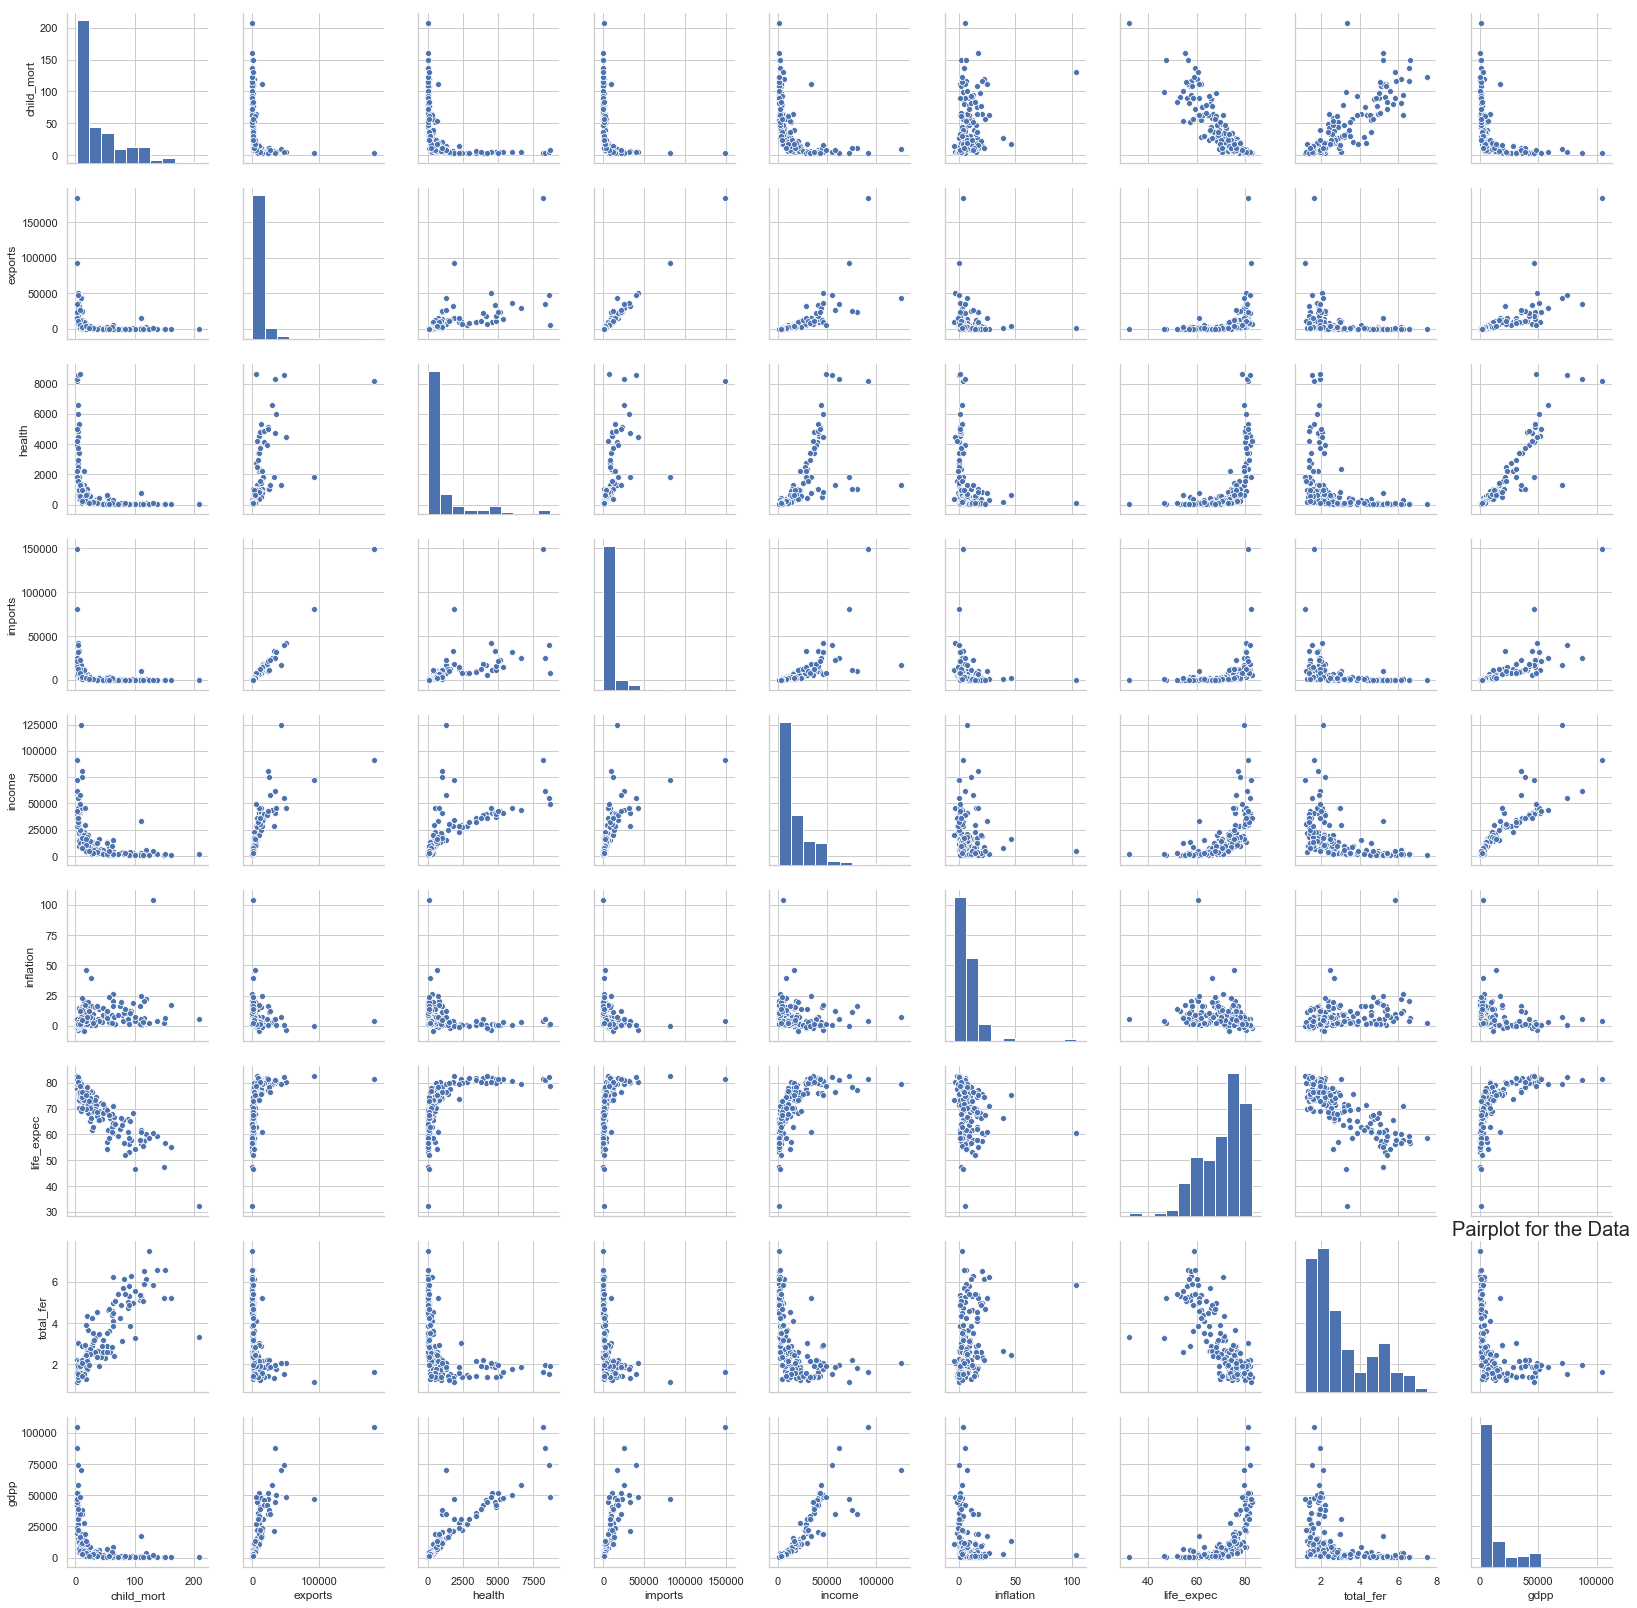

In [19]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

- We can able to see the `variation` in data

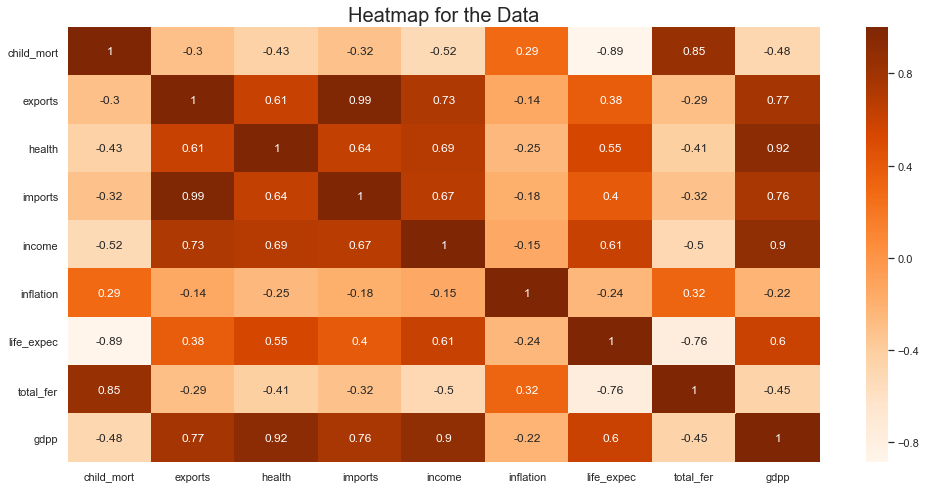

In [20]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Oranges', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

- The Above Graph for Showing the `correlation` between the different attributes of the `countries which are in dire need of aid Segementation Dataset`, This `Heat map` reflects the `most` correlated features with `Brown Color` and `least` correlated features with `White color`.

- We can clearly see that `most` of the attributes were in `good correlation` among them, but according to our `business requirement` we need to `identify` that `country` which is in `urgent` need of `AID` (Country having `high` child_mort, `low` income, and `low` GDP). We can `proceed` with those features

##### Outlier Treatment

- Doing outlier treatment will make clustering technique run in good way

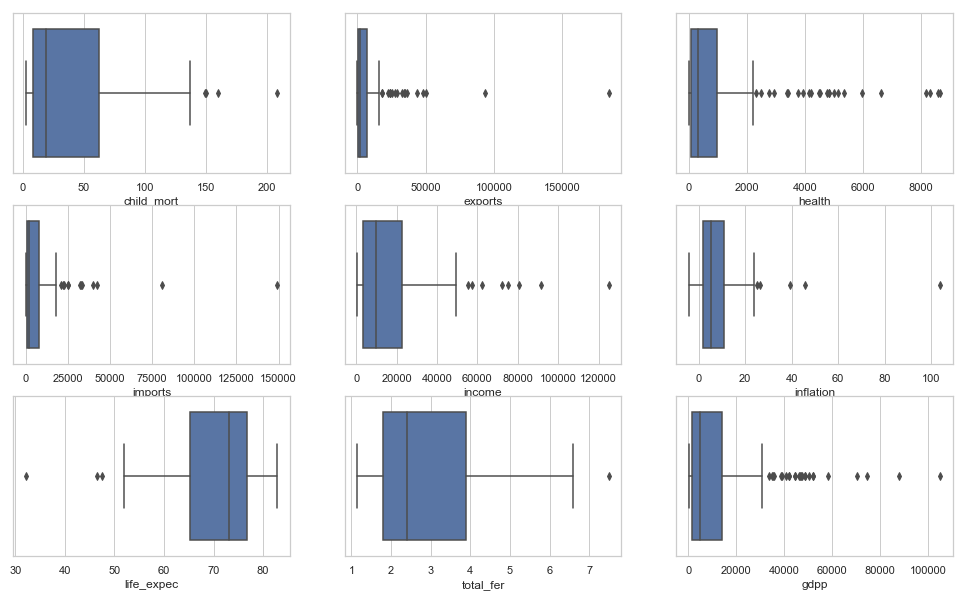

In [21]:
plt.figure(figsize=(15,10))
features=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]])

- Looking at these: we can `say` that we `need` to `treat` outlier to make clustering technique `run` in `good` way

###### Integer data types

In [22]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'int64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

,skew
income,2.211386
gdpp,2.198079


#### Analyzing and Interpreting the Skewness Values 

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.


* We can see that `all` two columns are `Highly Skewed` giving us a Hint that there would be `Outliers`
* To confirm that we will `check` the Box Plots for these Columns to become sure about the Outliers

##### income Column

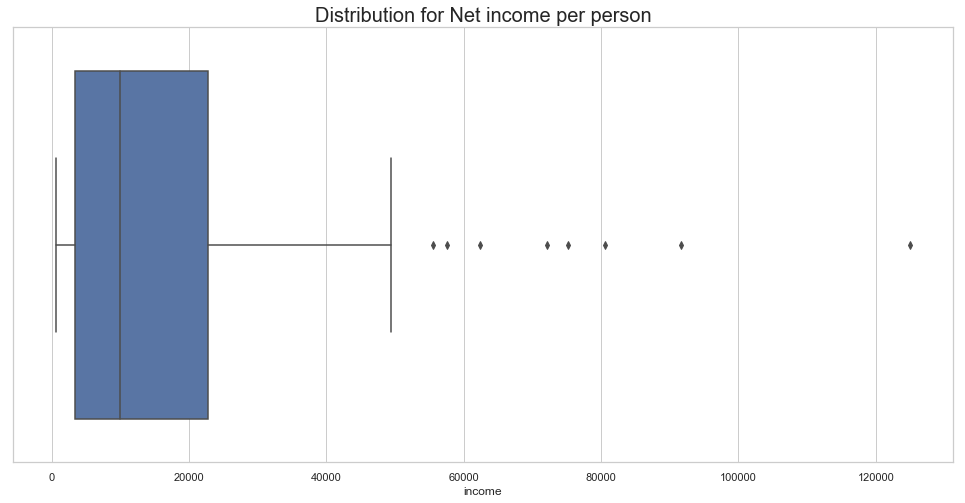

In [23]:
# lets check the Outliers of the income Columns
sns.boxplot(data['income'])
plt.title('Distribution for Net income per person', fontsize = 20)
plt.show()

- After Looking at the `Box plot`, It become `clear` that there are `Outliers`, and these outliers are also `important` to be `treated` for a `better` clustering model


We can also `see` through `histogram`

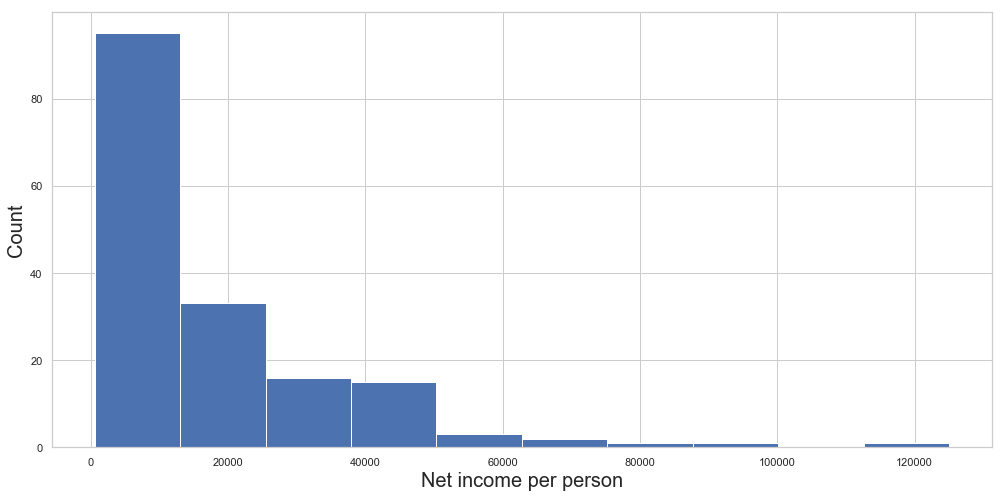

In [24]:
#plot the histogram of income variable.
data.income.hist()
plt.xlabel('Net income per person', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [25]:
data.income.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10      1524.0
0.20      2548.0
0.25      3355.0
0.50      9960.0
0.70     19540.0
0.80     29420.0
0.90     41220.0
0.95     48290.0
0.99     84374.0
1.00    125000.0
Name: income, dtype: float64

In [26]:
data.income.describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

- When we have very `less` value then `dropping` is not a good idea. So, we do cap

##### Capping

In [27]:
q4 = data['income'].quantile(0.95)

In [28]:
data['income'][data['income'] >= q4] = q4

- In capping, any value that is `beyond` the `95th percentile` we will `make` as 95th percentile

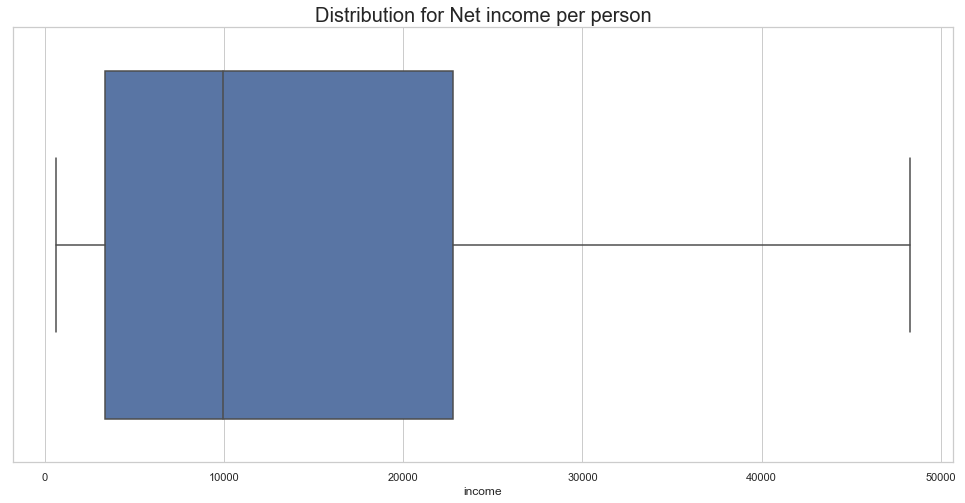

In [29]:
# lets check the Outliers of the income Columns
sns.boxplot(data['income'])
plt.title('Distribution for Net income per person', fontsize = 20)
plt.show()

- No outliers

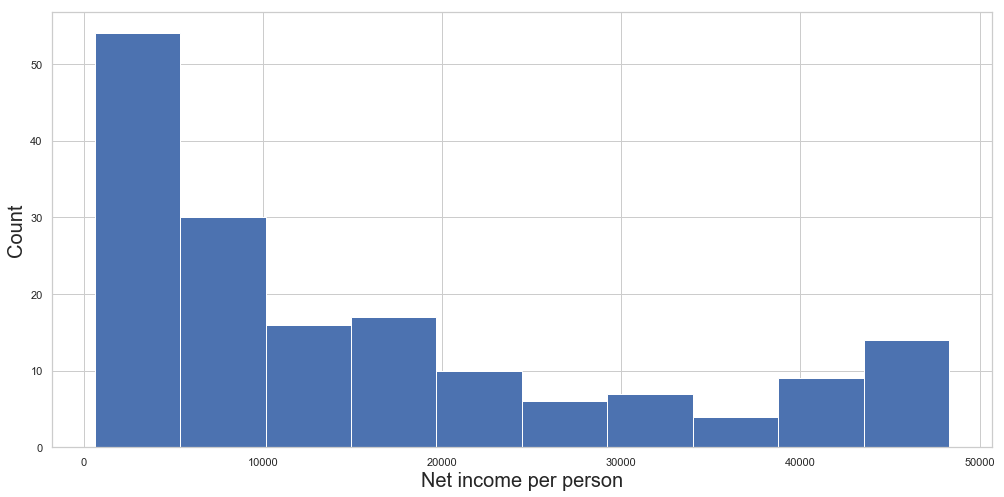

In [30]:
#plot the histogram of income variable.
data.income.hist()
plt.xlabel('Net income per person', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- It looks fine

##### GDP Column

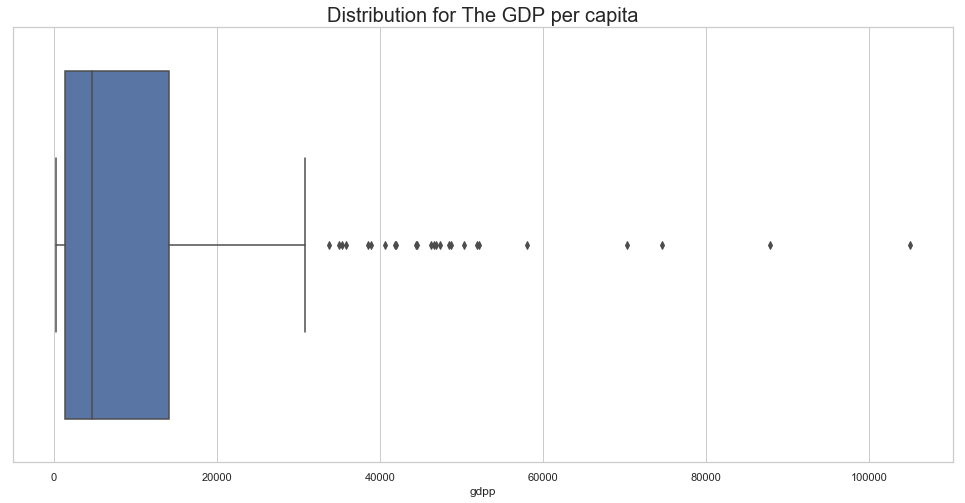

In [31]:
# lets check the Outliers of the gdpp Columns
sns.boxplot(data['gdpp'])
plt.title('Distribution for The GDP per capita', fontsize = 20)
plt.show()

- Yes there are `Outliers`, and these outliers are also `important` to be `treated` for a `better` clustering model


We can also `see` through `histogram`

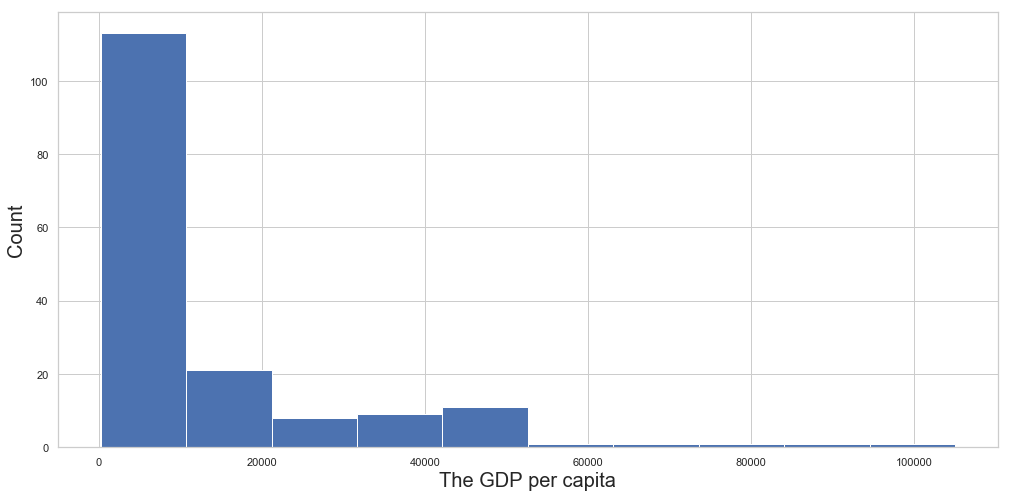

In [32]:
#plot the histogram of gdpp variable.
data.gdpp.hist()
plt.xlabel('The GDP per capita', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [33]:
data.gdpp.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10       593.8
0.20      1146.0
0.25      1330.0
0.50      4660.0
0.70     11920.0
0.80     21020.0
0.90     41840.0
0.95     48610.0
0.99     79088.0
1.00    105000.0
Name: gdpp, dtype: float64

##### Capping

In [34]:
q4 = data['gdpp'].quantile(0.95)

In [35]:
data['gdpp'][data['gdpp'] >= q4] = q4

- In capping, any value that is `beyond` the `95th percentile` we will `make` as 95th percentile

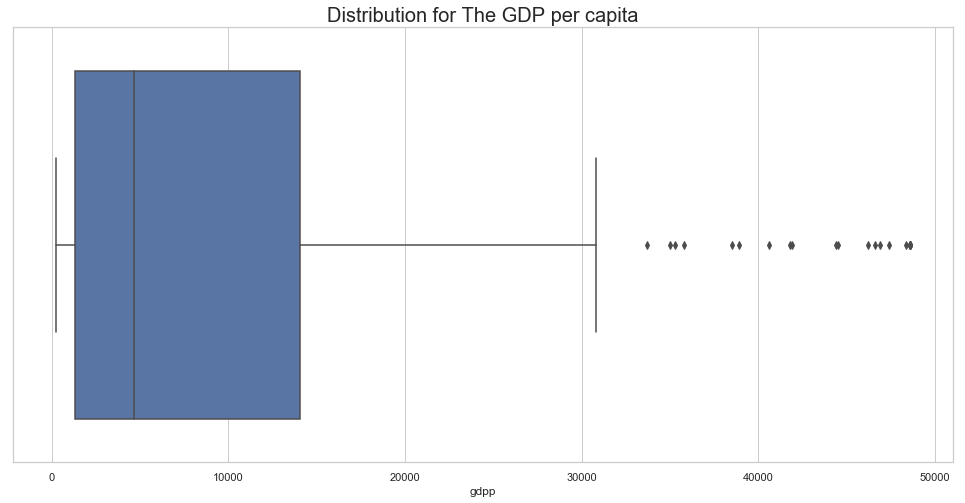

In [36]:
# lets check the Outliers of the gdpp Columns
sns.boxplot(data['gdpp'])
plt.title('Distribution for The GDP per capita', fontsize = 20)
plt.show()

- Good to go. If I `take` 90th percentile `instead of` 95th percentile than `many` data points can get `affected`.

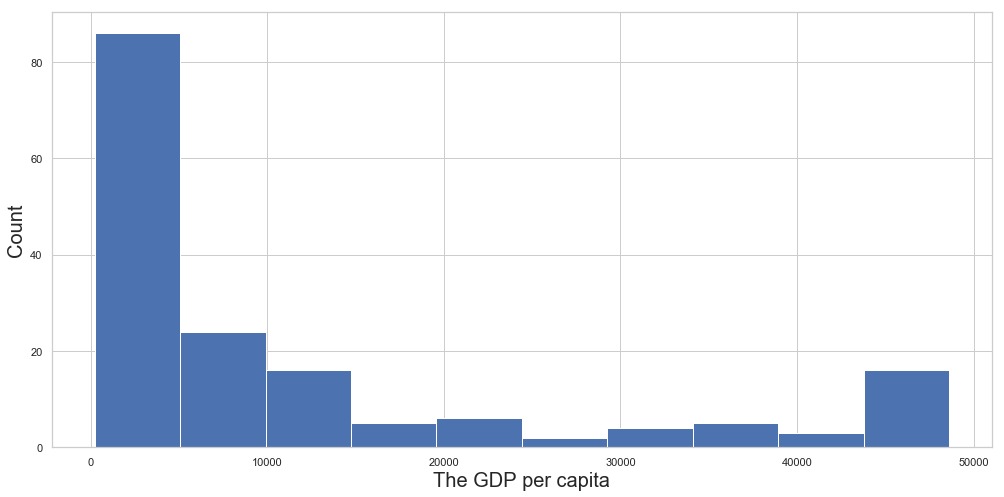

In [37]:
#plot the histogram of gdpp variable.
data.gdpp.hist()
plt.xlabel('The GDP per capita', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- It looks fine

In [38]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'int64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

,skew
gdpp,1.437938


* So, skewness get overcome.(like in `income` column earlier skewness was `2.211386` and now it came down to `0`, `gdpp` earlier `2.198079` and now `1.437938`)


* For now we can `leave` those values as it is. And `good` to go

###### Float data types

In [39]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

,skew
exports,6.659659
imports,6.558903
inflation,5.107640
health,2.503283
child_mort,1.437710
income,0.958910
total_fer,0.958383
life_expec,-0.962252


#### Analyzing and Interpreting the Skewness Values 

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.


* We can see that there are `four` columns which are `Highly Skewed` giving us a Hint that there would be `Outliers`
* To confirm that we will `check` the Box Plots for these Columns to become sure about the Outliers

##### exports Column

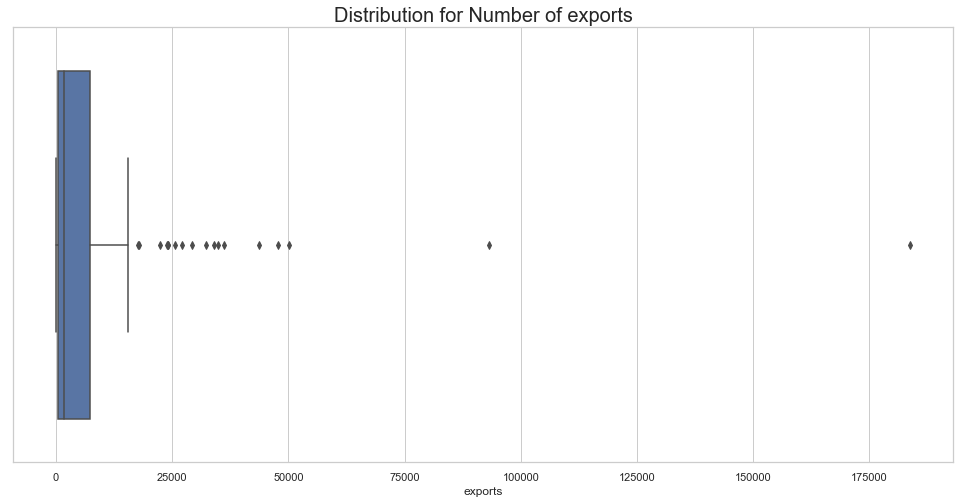

In [40]:
# lets check the Outliers of the exports Columns
sns.boxplot(data['exports'])
plt.title('Distribution for Number of exports', fontsize = 20)
plt.show()

- Yes there are `Outliers`, and these outliers are also `important` to be `treated` for a `better` clustering model


We can also `see` through `histogram`

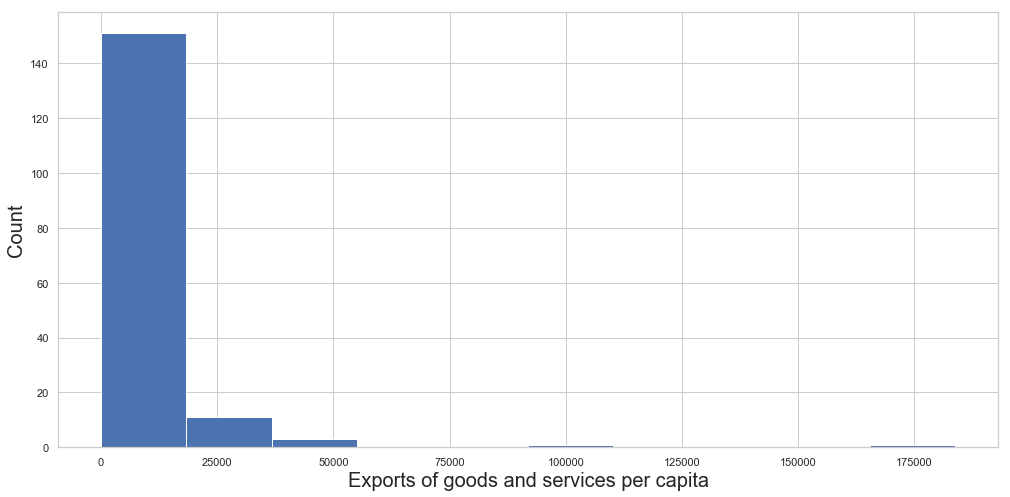

In [41]:
#plot the histogram of exports variable.
data.exports.hist()
plt.xlabel('Exports of goods and services per capita', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [42]:
data.exports.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10       110.224
0.20       294.268
0.25       447.140
0.50      1777.440
0.70      5517.880
0.80     10194.960
0.90     17760.600
0.95     31385.100
0.99     64794.260
1.00    183750.000
Name: exports, dtype: float64

In [43]:
q4 = data['exports'].quantile(0.95)

In [44]:
data['exports'][data['exports'] >= q4] = q4

- In capping, any value that is `beyond` the `95th percentile` we will `make` as 95th percentile

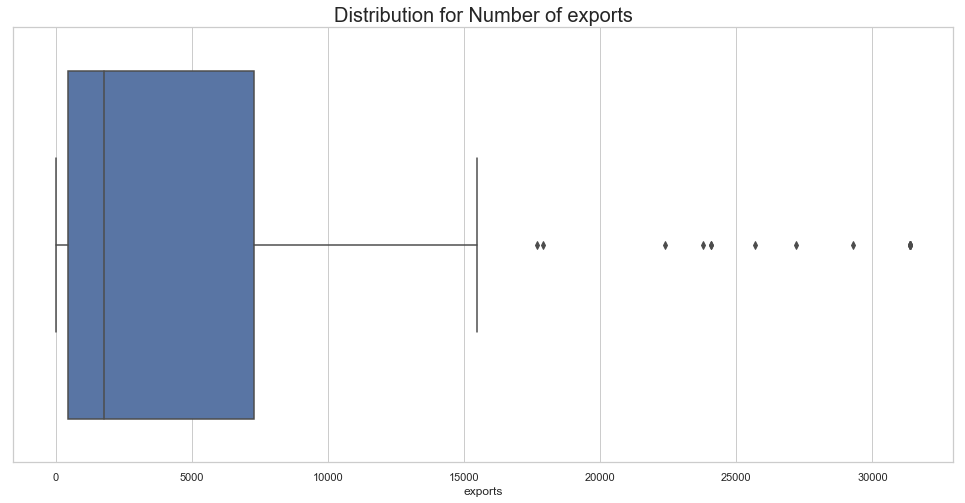

In [45]:
# lets check the Outliers of the exports Columns
sns.boxplot(data['exports'])
plt.title('Distribution for Number of exports', fontsize = 20)
plt.show()

- Good to go

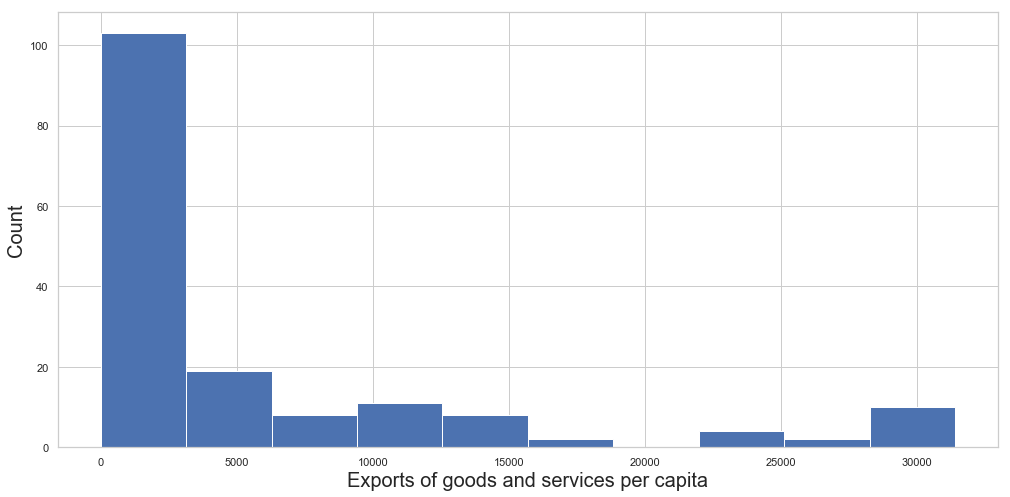

In [46]:
#plot the histogram of exports variable.
data.exports.hist()
plt.xlabel('Exports of goods and services per capita', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- After capping, still `data points` were `lies` in range `22000 to 32000`. For good clustering we can `leave` for now

###### imports Column

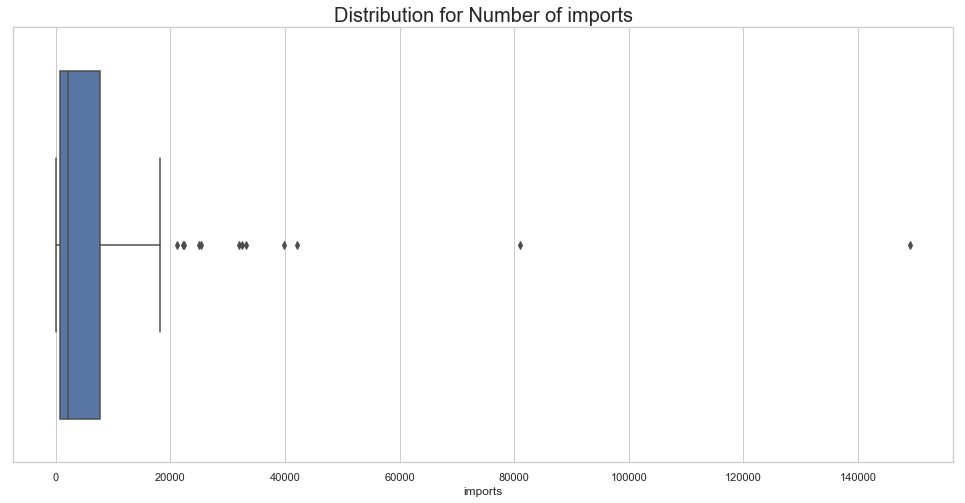

In [47]:
# lets check the Outliers of the imports Columns
sns.boxplot(data['imports'])
plt.title('Distribution for Number of imports', fontsize = 20)
plt.show()

- We need to `treat` outlier

We can also `see` through `histogram`

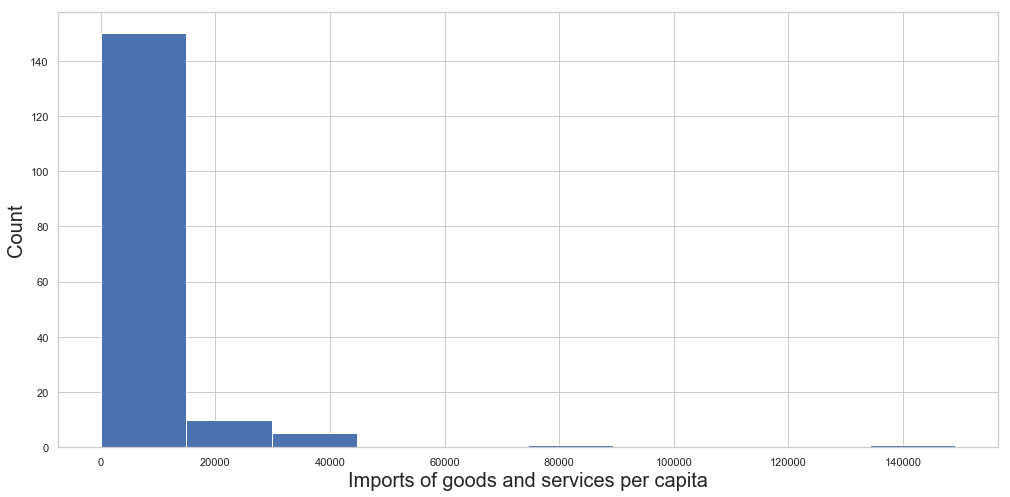

In [48]:
#plot the histogram of imports variable.
data.imports.hist()
plt.xlabel('Imports of goods and services per capita', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [49]:
data.imports.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10       211.006
0.20       409.998
0.25       640.215
0.50      2045.580
0.70      5310.424
0.80      9854.720
0.90     15034.280
0.95     24241.560
0.99     55371.390
1.00    149100.000
Name: imports, dtype: float64

In [50]:
q4 = data['imports'].quantile(0.95)

In [51]:
data['imports'][data['imports'] >= q4] = q4

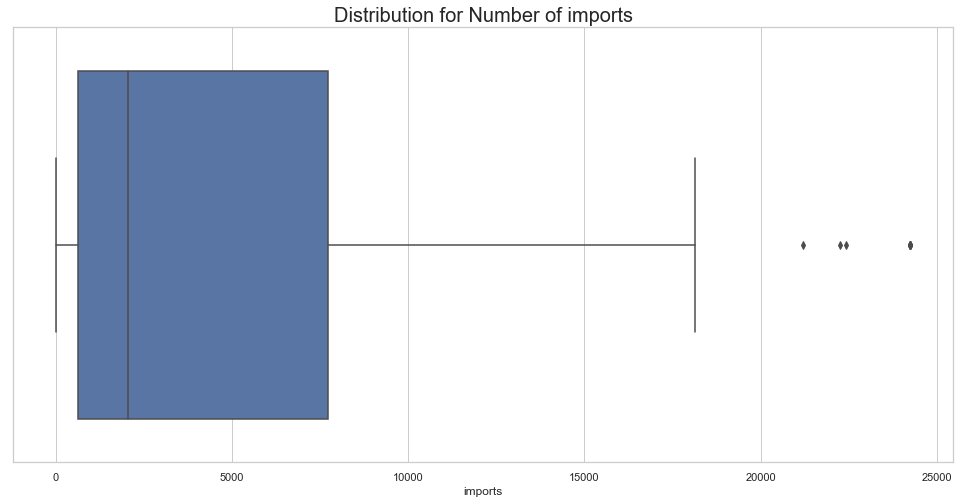

In [52]:
# lets check the Outliers of the imports Columns
sns.boxplot(data['imports'])
plt.title('Distribution for Number of imports', fontsize = 20)
plt.show()

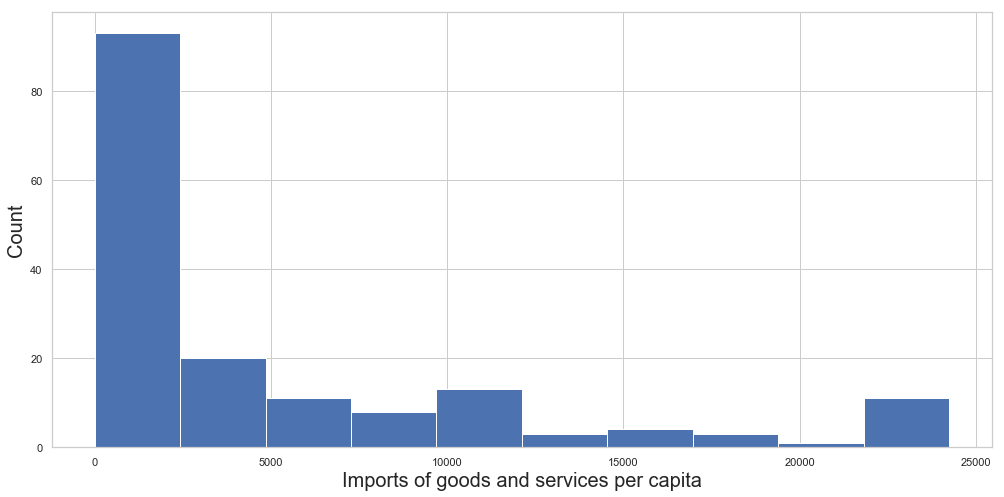

In [53]:
#plot the histogram of imports variable.
data.imports.hist()
plt.xlabel('Imports of goods and services per capita', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- Good to go

###### inflation Column

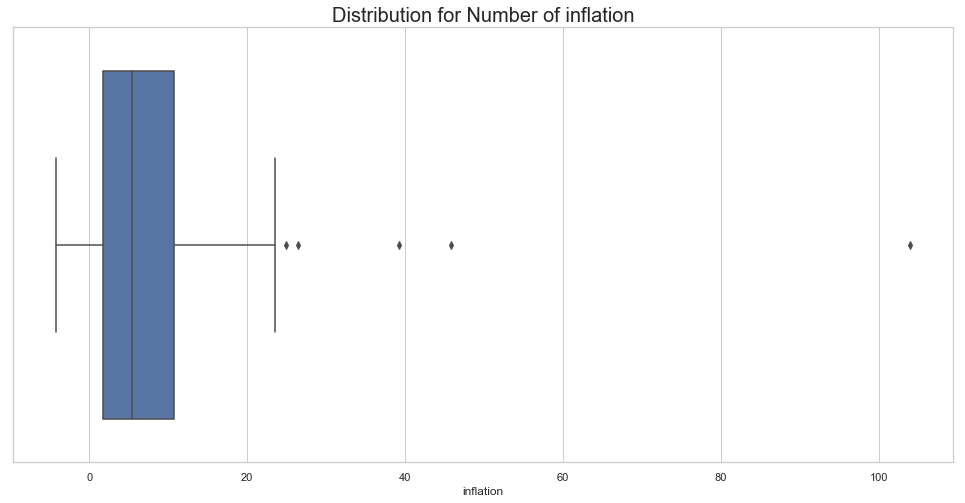

In [54]:
# lets check the Outliers of the inflation Columns
sns.boxplot(data['inflation'])
plt.title('Distribution for Number of inflation', fontsize = 20)
plt.show()

- Definately we need to treat outlier

Lets `see` through `histogram`

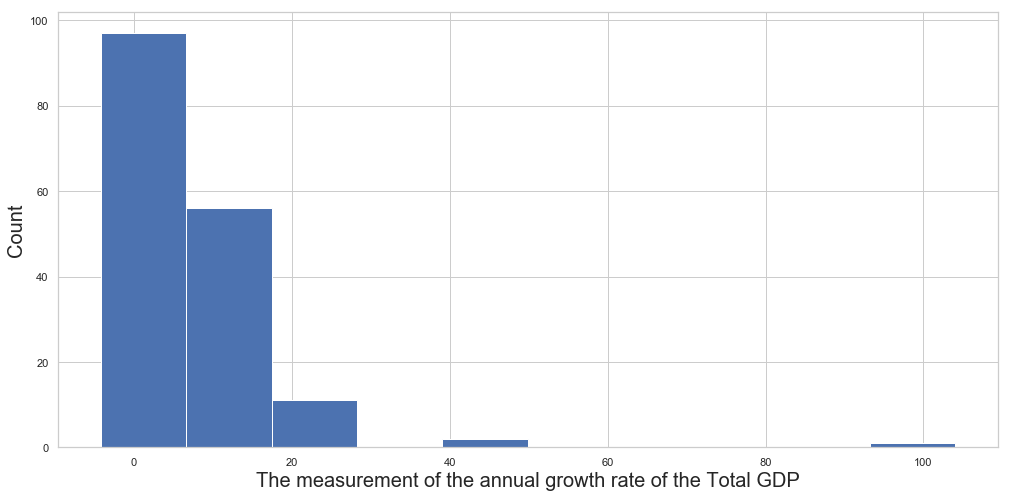

In [55]:
#plot the histogram of inflation variable.
data.inflation.hist()
plt.xlabel('The measurement of the annual growth rate of the Total GDP', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [56]:
data.inflation.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10      0.5878
0.20      1.4080
0.25      1.8100
0.50      5.3900
0.70      8.9640
0.80     12.5000
0.90     16.6400
0.95     20.8700
0.99     41.4780
1.00    104.0000
Name: inflation, dtype: float64

In [57]:
q4 = data['inflation'].quantile(0.95)

In [58]:
data['inflation'][data['inflation'] >= q4] = q4

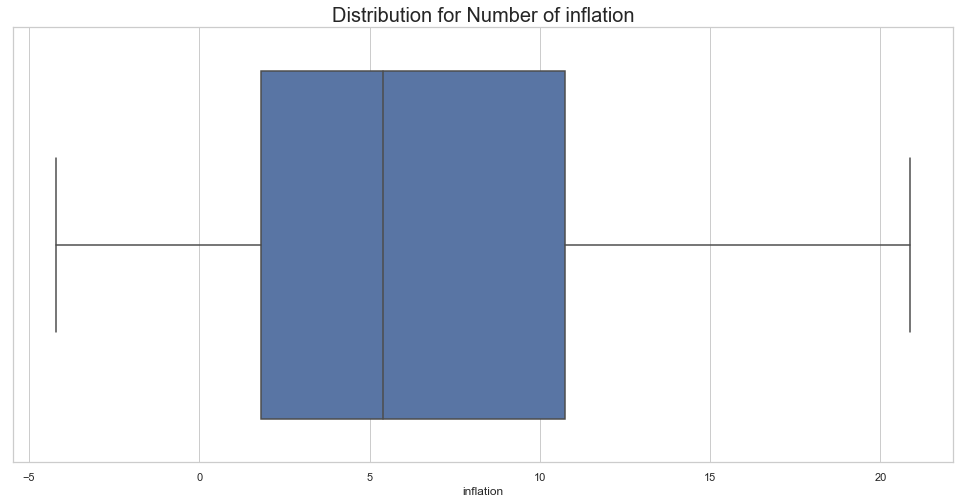

In [59]:
# lets check the Outliers of the inflation Columns
sns.boxplot(data['inflation'])
plt.title('Distribution for Number of inflation', fontsize = 20)
plt.show()

- All good

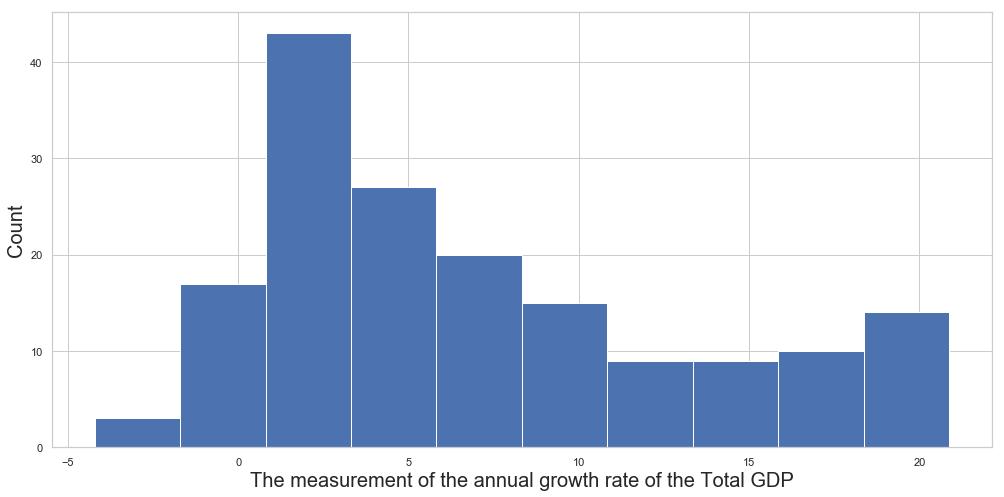

In [60]:
#plot the histogram of inflation variable.
data.inflation.hist()
plt.xlabel('The measurement of the annual growth rate of the Total GDP', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- It is `normally distributed`

###### health Column

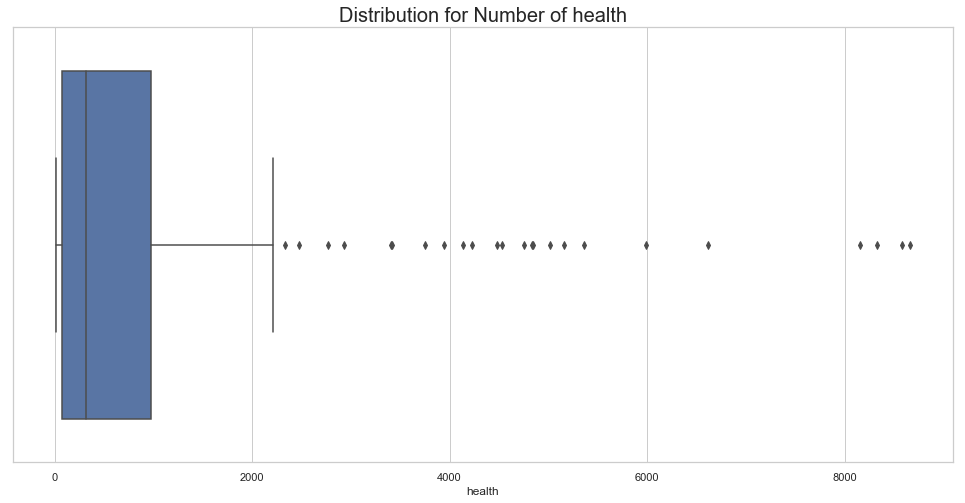

In [61]:
# lets check the Outliers of the health Columns
sns.boxplot(data['health'])
plt.title('Distribution for Number of health', fontsize = 20)
plt.show()

- we have to treat outlier

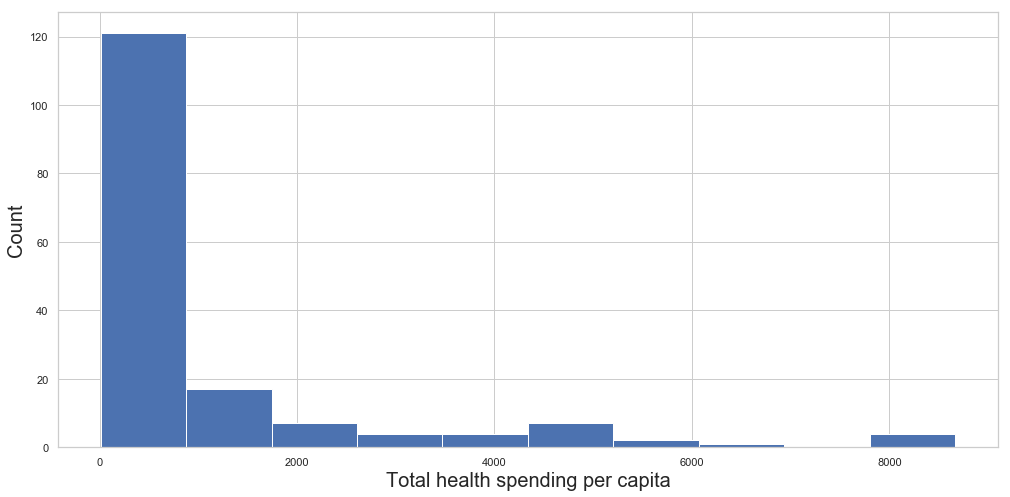

In [62]:
#plot the histogram of health variable.
data.health.hist()
plt.xlabel('Total health spending per capita', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [63]:
data.health.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10      36.5020
0.20      55.0640
0.25      78.5350
0.50     321.8900
0.70     757.0880
0.80    1274.6460
0.90    3825.4160
0.95    4966.7010
0.99    8410.3304
1.00    8663.6000
Name: health, dtype: float64

In [64]:
q4 = data['health'].quantile(0.95)

In [65]:
data['health'][data['health'] >= q4] = q4

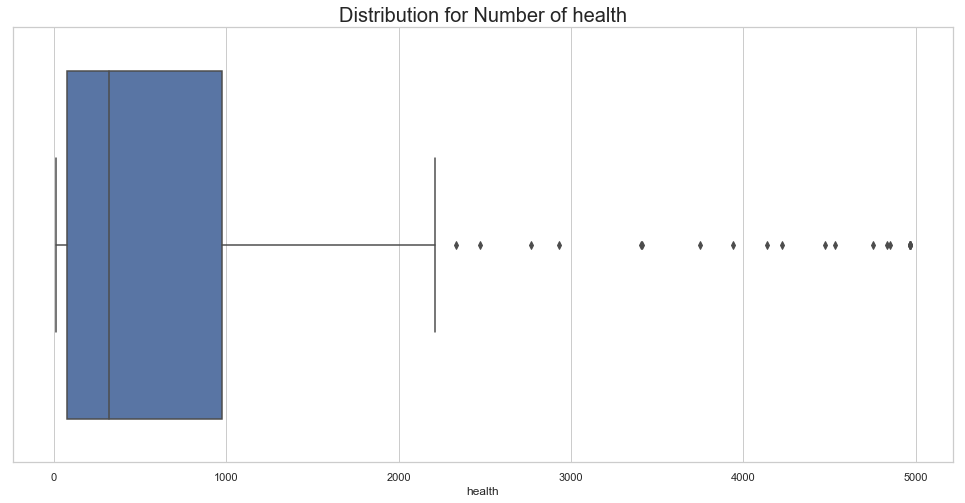

In [66]:
# lets check the Outliers of the health Columns
sns.boxplot(data['health'])
plt.title('Distribution for Number of health', fontsize = 20)
plt.show()

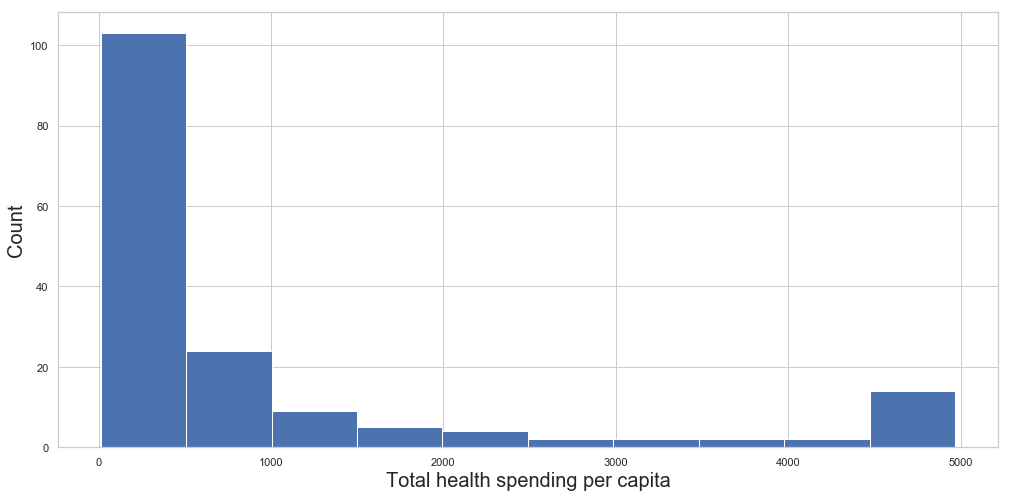

In [67]:
#plot the histogram of health variable.
data.health.hist()
plt.xlabel('Total health spending per capita', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- For now it is `good` to proceed

In [68]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

,skew
exports,1.920449
health,1.886402
imports,1.682672
child_mort,1.437710
income,0.958910
total_fer,0.958383
inflation,0.802852
life_expec,-0.962252


* Somehow, skewness get overcome.(like in `exports` column earlier skewness was `6.659659` and now it came down to `1.920449`, `imports` earlier `6.558903` and now `1.682672`, `inflation` earlier `5.107640` and now `0.802852`, `health` earlier `2.503283` and it came to `1.886402`)


* For now we can `leave` those values as it is.

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [69]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [70]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(data.drop('country',axis=1))

0.9047150381782669

- By `checking` my `Hopkins score` just to understand whether this data is good for clustering or not and it `looks` like we have a `good cluster` that can be `formed` using this data which has a `high tendency` to cluster.

In [71]:
data1 = data.drop('country',axis=1)

- So since I will `perform` my clustering I will `drop` my `country column` and `created` new data frame(`data1`)

##### Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(data1)   # return numpy array
data1 = pd.DataFrame(data1)     # converted back into pandas dataframe
data1.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629434,-0.732728,-0.958349,0.394438,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473485,-0.472182,-0.394006,-0.383226,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530018,-0.560152,-0.192552,1.440750,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588939,-0.543087,-0.667360,2.190136,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.704258,-0.541946,0.013312


- We `scaled` the data using `StandardScaler` and then `again` create these(`data1`) dataframe because the data1 dataframe will `return` the `numpy array`. So, `using` the numpy array we have `again` converted back to a `pandas` dataframe(data1) which we can `use`.

###### Lets  find  out  Number of Optimal Clusters (value k): 


##### Silhouette Score

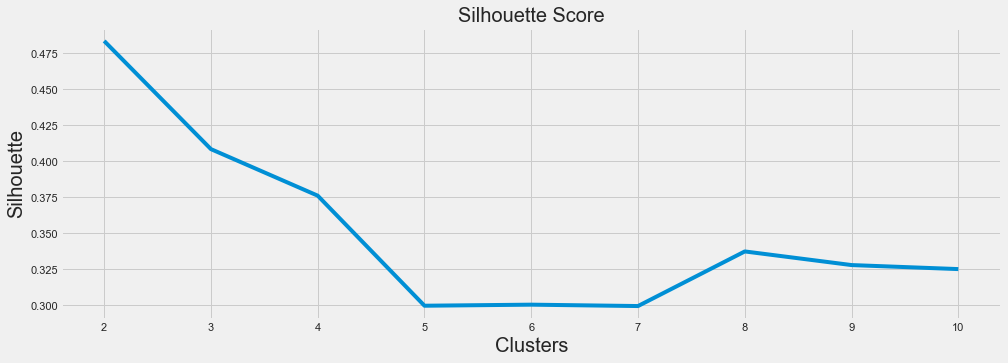

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(data1)
    ss.append([k,silhouette_score(data1,kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('Clusters',fontsize = 20)
plt.ylabel('Silhouette',fontsize = 20)
plt.show()

- In case of `Silhouette Score`, we will use that perticular value k for which the Silhouette Score is `maximum`. So, we can see maximum at cluster `K=2` but going with k=2 is `not` a good idea because k=2 basically means that we are just `dividing` data into `two halfs` and that's why 2 is not always taken as number of cluster. So, we will `go` with `next` highest value that is `3`.

##### Elbow Curve

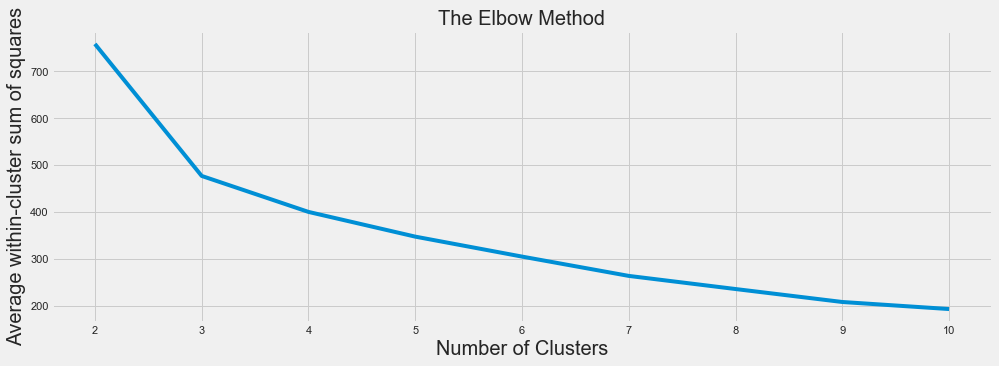

In [74]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(data1)
    ssd.append([k,kmean.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters',fontsize = 20)
plt.ylabel('Average within-cluster sum of squares',fontsize = 20)
plt.show()

- According to `Elbow Curve`, we can go with `3`


- According to my `bussiness requirement` we need to identify those country which are in urgent need of AID (Country having high child_mort, low income and low gdpp). So I can say that I will go with `3`

##### Clustering Analysis

##### Kmeans Algorithm

In [75]:
# k = 3
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

- We use `random state 100` because if labels will change then the defination that we are going to give to Clusters will also change and we don't want this to happen. 

In [76]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

- Once we have these label, lets `assign back` these labels to the `original` dataframe(`data`).

In [77]:
label = pd.DataFrame(kmeans.labels_,columns=['label'])

In [78]:
label

,label
0,2
1,0
2,0
3,2
4,0
5,0
6,0
7,1
8,1
9,0


In [79]:
# Let me create new copy of dataframe as data.kmean:

data.kmean = data.copy()

- I am using `copy function` because if we will take `data1=data` then data1 will be `linked` with data means what so ever we are going to do over here(data1) will be representing over here(data). So to `avoid` this we use copy(). so that data1 will get `new reference id` means we are creating a different version of same dataframe but the reference point will be the same

In [80]:
data.kmean = pd.concat([data.kmean, label], axis=1)

In [81]:
data.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,20.87,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,0


In [82]:
# How many data points we have in each clusters

data.kmean.label.value_counts()

0    82
2    48
1    37
Name: label, dtype: int64

- There are a `total` of `3 clusters` and in each, we get to see a `number` of data points

##### Visualizaing the Cluster

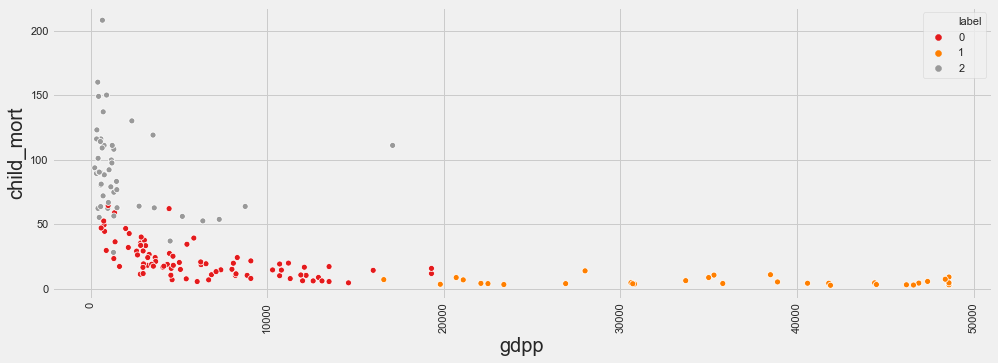

In [83]:
# Plot the cluster
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label',legend='full', data = data.kmean,  palette = 'Set1')
plt.xlabel('gdpp',fontsize = 20)
plt.ylabel('child_mort',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

- Through the scatter plot, we can see that
                                 cluster 0 on x-axis: range 5 to 19500 and y-axis: range 1 to 60
                                 cluster 1 on x-axis: range 18000 to 49000 and y-axis: range 0 to 15
                                 cluster 2 on x-axis: range 1 to 9000 and y-axis: range 30 to 210
- By this, we can infer that 
              cluster 2 are those whose child_mort is very high and GDP is very low
              cluster 0 are those whose child_mort and GDP is moderately high
              cluster 1 are those whose child_mort is very less and GDP is very high
According to our bussiness requirement, `cluster 2` are those country which are in urgent need of AID(Country having high child_mort, low income and low gdpp)

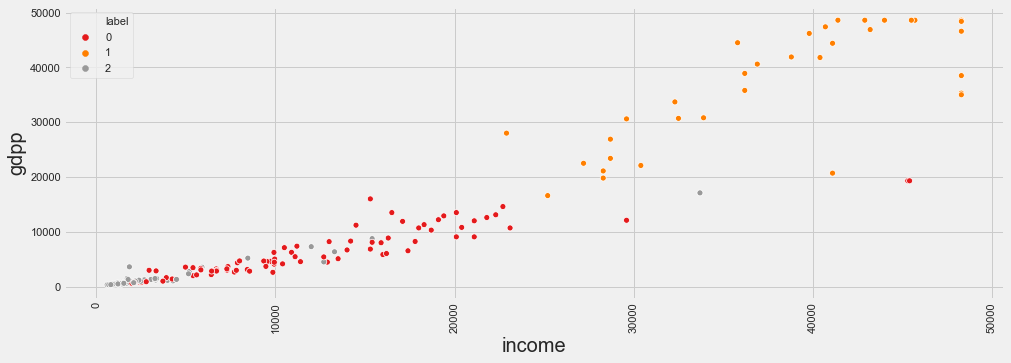

In [84]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label',legend='full', data = data.kmean, palette = 'Set1')
plt.xlabel('income',fontsize = 20)
plt.ylabel('gdpp',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

- Through the scatter plot, we can see that
                                 cluster 0 on x-axis: range 3000 to 23000 and y-axis: range 0 to 19900
                                 cluster 1 on x-axis: range 23000 to 48500 and y-axis: range 18500 to 49900
                                 cluster 2 on x-axis: range 10 to 16000 and y-axis: range 0 to 9900
- By this, we can infer that 
              cluster 2 are those whose income and GDP is very low
              cluster 0 are those whose income and GDP is moderate
              cluster 1 are those whose income and GDP is very high
According to our bussiness requirement, `cluster 2` are those country which are in urgent need of AID(Country having high child_mort, low income and low gdpp)

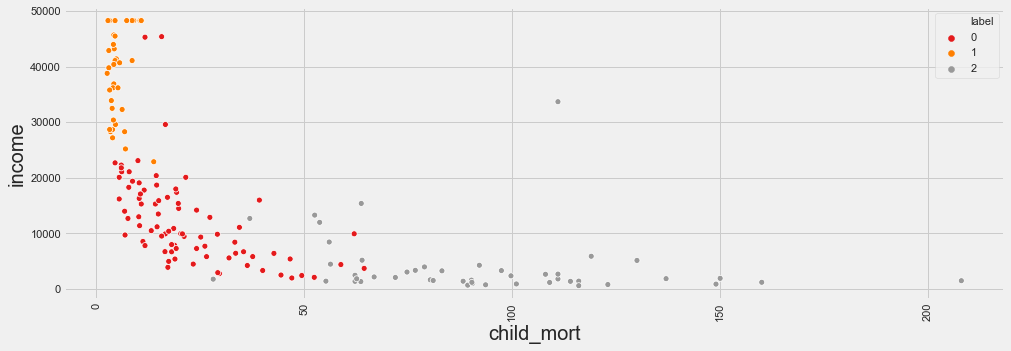

In [85]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label',legend='full', data = data.kmean, palette = 'Set1')
plt.xlabel('child_mort',fontsize = 20)
plt.ylabel('income',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

- Through the scatter plot, we can see that
                                 cluster 0 on x-axis: range 5 to 62 and y-axis: range 1000 to 21000
                                 cluster 1 on x-axis: range 2 to 20 and y-axis: range 21000 to 49000
                                 cluster 2 on x-axis: range 30 to 151 and y-axis: range 500 to 11000
- By this, we can infer that 
              cluster 2 are those whose income is very low and child_mort is very high
              cluster 0 are those whose income and child_mort is moderate
              cluster 1 are those whose income is very high and child_mort is very low
According to our bussiness requirement, `cluster 2` are those country which are in urgent need of AID(Country having high child_mort, low income and low gdpp)

##### Cluster Profiling

- Trying to `understand better` that `what` one cluster `talking about`

In [86]:
data.kmean.drop('country',axis=1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,21.951220,2789.162195,393.062073,2900.485610,12304.756098,7.155354,72.937805,2.289390,6287.463415
1,5.237838,18780.372973,3285.879162,15698.857838,38711.081081,2.588432,79.956757,1.755676,37745.675676
2,91.610417,879.063542,114.822083,827.028750,3897.354167,9.889271,59.239583,4.992083,1909.208333


- In this, I have tried to `check` the `mean` of `all` the clusters. what is the `Cluster mean` or `center point` with respect to GDP, child_mort and income columns for `cluster number 2`

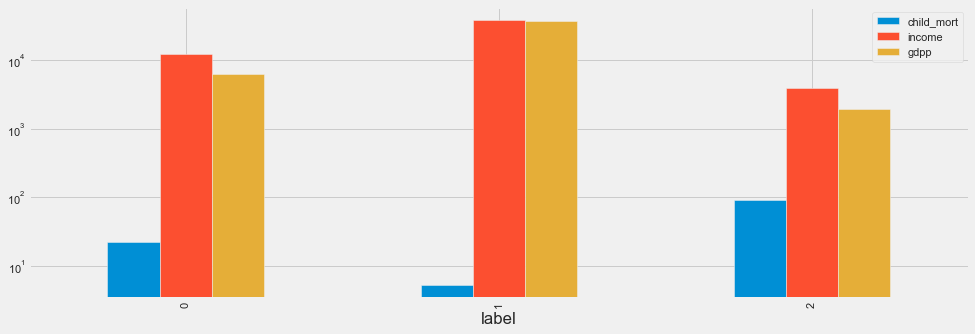

In [87]:
data.kmean.drop(['country','exports',
                 'health','imports',
                 'inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind='bar')
plt.yscale('log')
plt.show()

- we can see by bar plot that 
                    cluster 2 are those types of countries that are having high child_mort and moderate income and GDP
                    cluster 1 are those types of countries that are having low child_mort, high income and GDP
                    cluster 0 are those types of countries that are having moderate child_mort and high income and GDP
According to our bussiness requirement, `cluster 2` are those country which are in urgent need of AID(Country having high child_mort, low income and low gdpp)

In [88]:
# Once the cluster has been identified: Filter the data for that cluster

data.kmean[data.kmean['label'] == 2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

- These are the countries which are in urgent need of AID (Country having high child_mort, low income and low GDP)

In [89]:
data.kmean[data.kmean['label'] == 2].sort_values(by=['child_mort','income','gdpp'], ascending = [False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399,2
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446,2
97,Mali,137.0,161.42,35.26,248.51,1870.0,4.37,59.5,6.55,708,2


- According to our `business requirement`, These are the `top 5` countries which are in urgent need of AID (Country having high child_mort, low income and low GDP)

- The countries which are in dire need of aid based on some `socio-economic` and `health factors` are `Haiti`, `Sierra Leone`, `Chad`, `Central African Republic` and `Mali`	

- This Clustering Analysis gives us a very clear insight about the different segments of those countries which are in urgent need of AID. There are clearly `three segments` of Countries based on their high child_mort, low income and low GDP which are reportedly the best factors/attributes to determine the segments of countries which are in urgent need of AID.

##### Hierarchial Clustering

###### Using Dendrograms to find the number of Optimal Clusters

In [90]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

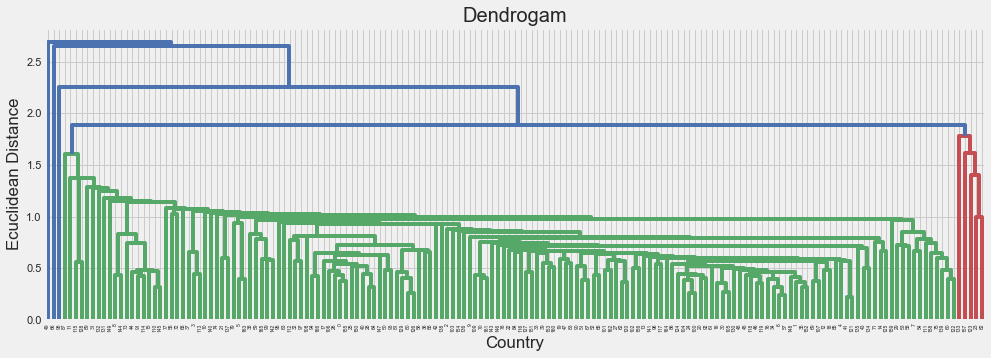

In [91]:
# single linkage
mergings = linkage(data1, method="single", metric='euclidean')
dendrogram(mergings)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Ecuclidean Distance')
plt.show()

- We can clearly see that `single linkage` consider `shortest distance` between two points in each cluster

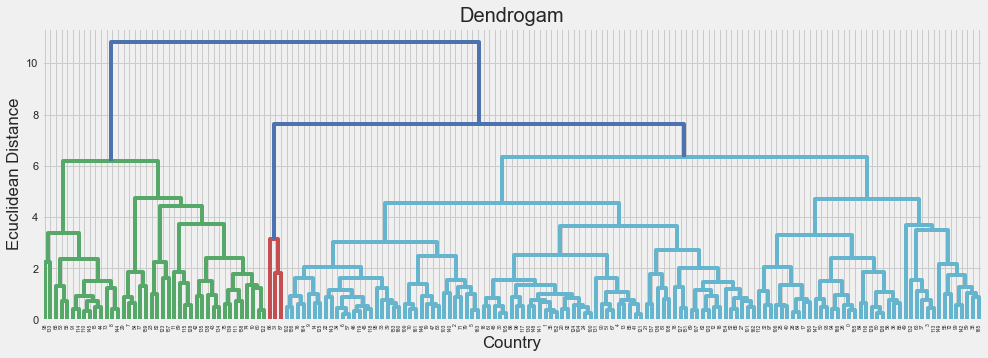

In [92]:
# complete linkage
mergings = linkage(data1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Ecuclidean Distance')
plt.show()

- Whereas in the `complete linkage`. It considered the `longest distance` between `2 points` in `each` cluster


- Based on the `result` we can choose `complete linkage` for `Hierarchial Clustering` because it does `well` in separating clusters if there is `noise` between clusters and we will `cut` our `dendrogam` at `7` which we will get `3 clusters`

In [93]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [94]:
# assign cluster labels
data['cluster_labels'] = cluster_labels
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,20.87,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,0


In [95]:
# How many data points we have in each clusters

data.cluster_labels.value_counts()

0    124
1     40
2      3
Name: cluster_labels, dtype: int64

- There are a `total` of `3 clusters` and in each, we get to see a `number` of data points

###### Visualizing the Clusters of Hierarchial Clustering

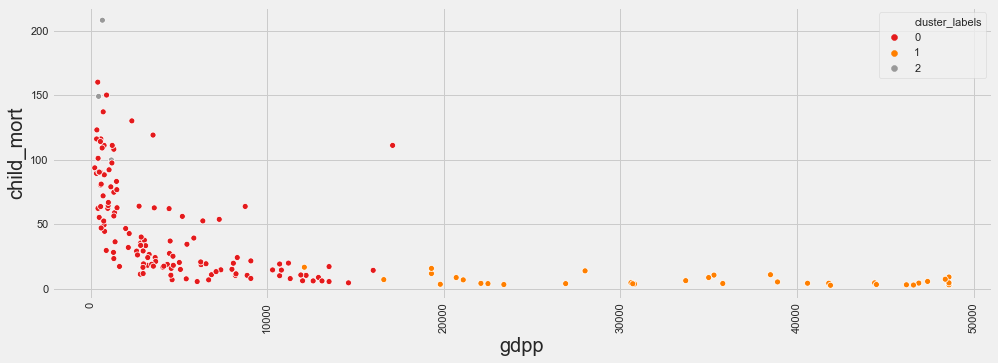

In [96]:
# Plot the cluster
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels',legend='full', data = data,  palette = 'Set1')
plt.xlabel('gdpp',fontsize = 20)
plt.ylabel('child_mort',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

- Through the scatter plot, we can see that
                                 cluster 0 on x-axis: range 0 to 15500 and y-axis: range 1 to 160
                                 cluster 1 on x-axis: range 11500 to 49000 and y-axis: range 0 to 20
                                 cluster 2 on x-axis: range 1 to 500 and y-axis: range 100 to 210
- By this, we can infer that 
              cluster 2 are those whose child_mort is very high and GDP is very low
              cluster 0 are those whose child_mort and GDP is moderately high
              cluster 1 are those whose child_mort is very less and GDP is very high
According to our bussiness requirement, `cluster 2` are those country which are in urgent need of AID(Country having high child_mort, low income and low gdpp)

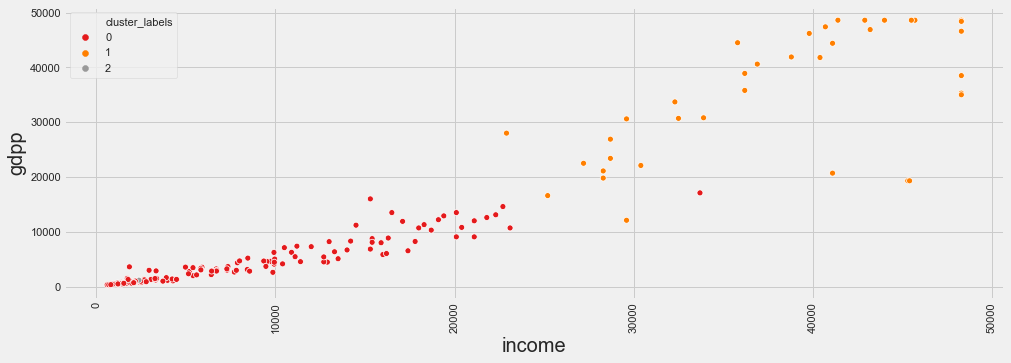

In [97]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_labels',legend='full', data = data, palette = 'Set1')
plt.xlabel('income',fontsize = 20)
plt.ylabel('gdpp',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

- Through the scatter plot, we can see that
                                 cluster 0 on x-axis: range 100 to 23000 and y-axis: range 0 to 19900
                                 cluster 1 on x-axis: range 23000 to 48500 and y-axis: range 18500 to 49900
                                 cluster 2 on x-axis: range 10 to 1000 and y-axis: range 0 to 1000
- By this, we can infer that 
              cluster 2 are those whose income and GDP is very low
              cluster 0 are those whose income and GDP is moderate
              cluster 1 are those whose income and GDP is very high
According to our bussiness requirement, `cluster 2` are those country which are in urgent need of AID(Country having high child_mort, low income and low gdpp)

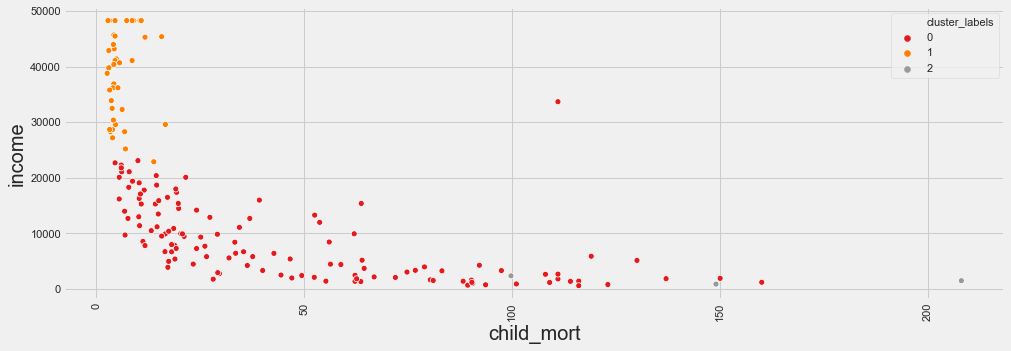

In [98]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels',legend='full', data = data, palette = 'Set1')
plt.xlabel('child_mort',fontsize = 20)
plt.ylabel('income',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

- Through the scatter plot, we can see that
                                 cluster 0 on x-axis: range 5 to 130 and y-axis: range 5 to 21000
                                 cluster 1 on x-axis: range 2 to 20 and y-axis: range 21000 to 49000
                                 cluster 2 on x-axis: range 100 to 210 and y-axis: range 100 to 500
- By this, we can infer that 
              cluster 2 are those whose income is very low and child_mort is very high
              cluster 0 are those whose income and child_mort is moderate
              cluster 1 are those whose income is very high and child_mort is very low
According to our bussiness requirement, `cluster 2` are those country which are in urgent need of AID(Country having high child_mort, low income and low gdpp)

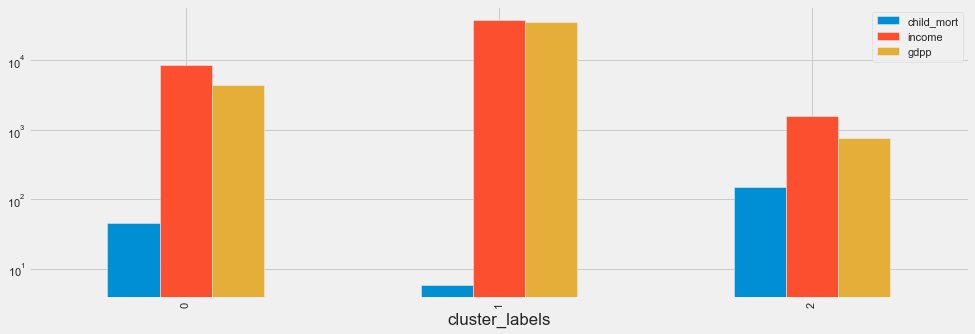

In [99]:
data.drop(['country','exports',
           'health','imports',
           'inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind='bar')
plt.yscale('log')
plt.show()

- we can see by bar plot that 
                    cluster 2 are those types of countries that are having high child_mort and moderate income and GDP
                    cluster 1 are those types of countries that are having low child_mort, high income and GDP
                    cluster 0 are those types of countries that are having moderate child_mort and high income and GDP
According to our bussiness requirement, `cluster 2` are those country which are in urgent need of AID(Country having high child_mort, low income and low gdpp)

In [100]:
data[data['cluster_labels'] == 2].sort_values(by=['child_mort','income','gdpp'], ascending = [False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.33,662,2
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446,2
87,Lesotho,99.7,460.98,129.87,1181.70,2380.0,4.15,46.5,3.30,1170,2


- According to our `business requirement`, These are the `top 5` countries which are in urgent need of AID (Country having high child_mort, low income and low GDP)

- By doing Hierarchical and K-means `Clustering` we have got the `same countries` that are in dire need of AID.


- The countries which are in dire need of aid based on some `socio-economic` and `health factors` are `Haiti`, `Central African Republic`, `Lesotho`, `Sierra Leone`, `Mali` and `Chad`	